# HOUSE PRICES: Advanced regression techniques

Join the Kaggle competition titled: “House Prices - Advanced Regression Techniques” (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv) 
We aim to predict the sales price of the houses based on the features given in the data set.


In [1]:
# Import the librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data preprocessing: Training data
* Cleaning the data
* Feature engineering

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# To check the sum of missing values for each features
# Features with lots of missing values will be dropped
# Consider also domain expert knowledge
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

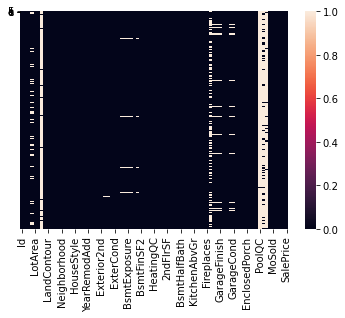

In [6]:
# To check the missing values of the features
# From the heatmap we cn sea that PoolQc, MoSold and other have high missing values
sns.heatmap(df.isnull(),yticklabels='False',cbar='False')

In [7]:
# Filling the missing values: Replacng values by their mean or objects by their modes (most frequent categories)
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode([0]))
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode([0]))
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode([0]))
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode([0]))
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode([0]))
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode([0]))
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode([0]))
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode([0]))
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode([0]))
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode([0]))
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode([0]))

In [8]:
# Dropping some entries: perform for features with at leat 50% null values
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'],axis=1,inplace=True)
df.shape

(1460, 75)

<AxesSubplot:>

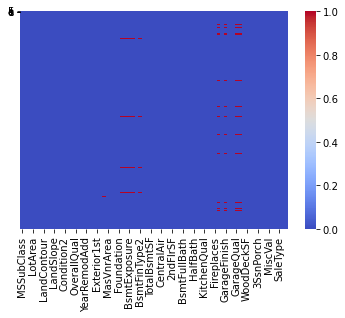

In [9]:
# Observed the clean data
sns.heatmap(df.isnull(),yticklabels='False',cbar='False',cmap='coolwarm')

In [10]:
df.dropna(inplace=True)
df.shape

(1338, 75)

In [11]:
dataset_df=pd.concat(df,cleanset)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotFrontage    1338 non-null   float64
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemo

In [13]:
# Get the list of categorical features: We need to transform them into numerical features
# We use dummy variable conversion

Object_column=['MSZoning','Street','LotShape',
    ]

In [14]:
numeric_data = dataset.select_dtypes(include=[np.number])
categorical_data = dataset.select_dtypes(exclude=[np.number])

numeric_data.shape[1]
categorical_data.shape[1]

NameError: name 'dataset' is not defined

## Data preprocessing: Test data
* Cleaning the data
* Feature engineering